## Week 4


Following our section on data collection, we shift focus to analyzing social data. The course will now cover basic tools in Network and Text Analysis, applying these to previously collected data. We start with Network Science.

Networks, or graphs, are crucial for representing and analyzing social systems. This week introduces networks through three main topics:

* __Context__: An overview of network science history and basic network concepts.
* __The NetworkX Library__: Introduction to this Python library for network analysis.
* __Basic Network Analysis:__ We will analyze and visualize the network of Computational Social Scientists using NetworkX.
  
The objective is to ensure you learn about the field of network science and get hands-on experience using the NetworkX library for fundamental analysis.

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. First, we will go through the history of Network Science. 

> **_Video Lecture_**. Start by watching the "History of Networks"

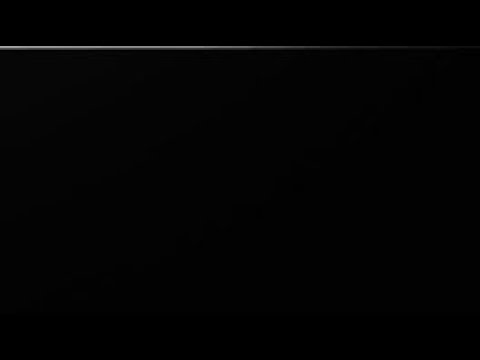

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo("kt6J36e0JCk",width=800, height=450)

> **_Video Lecture_**. Then check out a short video on "Network Notation"

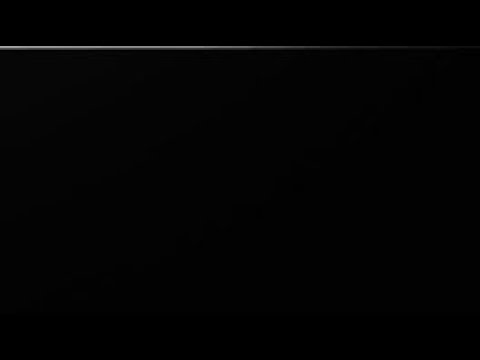

In [12]:
YouTubeVideo("_AT9HaTE9nE",width=800, height=450)

> __Reading__. To better familiarize with basic concepts in Network Science, we will read two chapters in the _Network Science_ book by Laszlo Barabasi. You can read the whole 
> book for free [**here**](https://networksciencebook.com/). 
> 
> * [Read chapter 1](http://networksciencebook.com/chapter/1)
> * [Read chapter 2](http://networksciencebook.com/chapter/2)
> 

# Prelude to Part 2: The NetworkX library 

In this course, we will leverage the NetworkX Python library for network analysis. To effectively work with real-world networks, it is essential that you familiarize with NetworkX beforehand.

> __Exercise__
>
> * Download the NetworkX project's [tutorial](https://networkx.org/documentation/stable/tutorial.html). Familiarize with the basics like creating graphs, accessing node and edge properties, and visualizing graphs.
> * Experiment with the tutorial code. Feel free to tweak it to understand how things work.

In [3]:
import networkx as nx
G = nx.Graph()

In [7]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

H = nx.path_graph(10)
G.add_nodes_from(H)

In [8]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [10]:
G.add_edges_from(H.edges)
G.clear()


In [11]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [12]:
G.number_of_nodes(), G.number_of_edges()

(8, 3)

# Part 2: Basic analysis of the network of Computational Social Scientists

Ok, enough with theory. It is time to go back to our dataset. 
We will build the network of Computational Social Scientists. Then, we will use some Network Science to study some of its properties.

> **Exercise 1: Constructing the Computational Social Scientists Network**
>
> In this exercise, we will create a network of researchers in the field of Computational Social Science using the NetworkX library. In our network, nodes represent authors of academic papers, with a direct link from node _A_ to node _B_ indicating a joint paper written by both. The link's weight reflects the number of papers written by both _A_ and _B_.
>
> **Part 1: Network Construction**
>
> 1. **Weighted Edgelist Creation:** Start with your dataframe of *papers*. Construct a _weighted edgelist_ where each list element is a tuple containing three elements: the _author ids_ of two collaborating authors and the total number of papers they've co-authored. Ensure each author pair is listed only once. 
>
> 2. **Graph Construction:**
>    - Use NetworkX to create an undirected [``Graph``](https://networkx.org/documentation/stable/reference/classes/graph.html).
>    - Employ the [`add_weighted_edges_from`](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_weighted_edges_from.html#networkx.Graph.add_weighted_edges_from) function to populate the graph with the weighted edgelist from step 1, creating a weighted, undirected graph.
>
> 3. **Node Attributes:**
>    - For each node, add attributes for the author's _display name_, _country_, _citation count_, and the _year of their first publication_ in Computational Social Science. This information should be retrieved from your _authors_ dataset. You can use the _papers_ dataset to retreive the total number of citations per author. 
>    - Save the network as a JSON file.
>      
> **Part 2: Preliminary Network Analysis**
> Now, with the network constructed, perform a basic analysis to explore its features.
> 1. **Network Metrics:**
>   
>    - What is the total number of nodes (authors) and links (collaborations) in the network? 
>    - Calculate the network's density (the ratio of actual links to the maximum possible number of links). Would you say that the network is sparse? Justify your answer.
>    - Is the network fully connected (i.e., is there a direct or indirect path between every pair of nodes within the network), or is it disconnected?
>    - If the network is disconnected, how many connected components does it have? A connected component is defined as a subset of nodes within the network where a path exists between any pair of nodes in that subset. 
>    - How many isolated nodes are there in your network?  An isolated node is defined as a node with no connections to any other node in the network.
>    - Discuss the results above on network density, and connectivity. Are your findings in line with what you expected? Why? 
> 
> 3. **Degree Analysis:**
>    - Compute the average, median, mode, minimum, and maximum degree of the nodes. Perform the same analysis for node strength (weighted degree). What do these metrics tell us about the network?
> 
> 4. **Top Authors:**
>    - Identify the top 5 authors by degree. What role do these node play in the network? 
>    - Research these authors online. What areas do they specialize in? Do you think that their work aligns with the themes of Computational Social Science? If not, what could be possible reasons? 


# Part 1

In [14]:
import pandas as pd
import networkx as nx
import json
import ast
from itertools import combinations
from collections import Counter, defaultdict

In [15]:
PAPERS_PATH = "CSS_Papers_D2plusD5.csv"
AUTHORS_PATH = "CSS_Authors_D1plusD4.csv"

papers = pd.read_csv(PAPERS_PATH)
authors = pd.read_csv(AUTHORS_PATH)

print("papers cols:", papers.columns.tolist())
print("authors cols:", authors.columns.tolist())
papers.head()

papers cols: ['id', 'publication_year', 'cited_by_count', 'author_ids']
authors cols: ['query_name', 'id', 'display_name', 'works_api_url', 'h_index', 'works_count', 'country_code', 'matched', 'cited_by_count']


,id,publication_year,cited_by_count,author_ids
0,https://openalex.org/W2047940964,2004.0,7318,"['https://openalex.org/A5014647140', 'https://..."
1,https://openalex.org/W3103362336,2018.0,6724,"['https://openalex.org/A5014647140', 'https://..."
2,https://openalex.org/W2157082398,2008.0,2162,"['https://openalex.org/A5014647140', 'https://..."
3,https://openalex.org/W2061099285,2010.0,948,"['https://openalex.org/A5069948947', 'https://..."
4,https://openalex.org/W2102017123,2015.0,592,"['https://openalex.org/A5014647140', 'https://..."


In [16]:
def parse_author_ids(x):
    if isinstance(x, list):
        return x
    if not isinstance(x, str):
        return []
    s = x.strip()
    if s == "" or s.lower() == "nan":
        return []
    # try JSON first
    try:
        out = json.loads(s)
        return out if isinstance(out, list) else []
    except Exception:
        pass
    # fallback: python literal list like "['a','b']"
    try:
        out = ast.literal_eval(s)
        return out if isinstance(out, list) else []
    except Exception:
        return []

In [17]:
papers["author_ids"] = papers["author_ids"].apply(parse_author_ids)

# sanity check: are we getting real lists?
lens = papers["author_ids"].apply(len)
print("author_ids length stats:", lens.describe())
print("Example author_ids:", papers["author_ids"].iloc[lens.idxmax()])

author_ids length stats: count    52468.000000
mean         2.703305
std          1.245407
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: author_ids, dtype: float64
Example author_ids: ['https://openalex.org/A5066731285', 'https://openalex.org/A5063113082', 'https://openalex.org/A5090745602', 'https://openalex.org/A5090650053', 'https://openalex.org/A5054751614', 'https://openalex.org/A5061131179', 'https://openalex.org/A5086777696', 'https://openalex.org/A5091645410', 'https://openalex.org/A5056849976']


In [18]:
pair_counts = Counter()

for ids in papers["author_ids"]:
    # keep valid strings only, unique per paper
    ids = sorted({a for a in ids if isinstance(a, str) and a.startswith("http")})
    if len(ids) < 2:
        continue
    for a, b in combinations(ids, 2):
        pair_counts[(a, b)] += 1

weighted_edgelist = [(a, b, w) for (a, b), w in pair_counts.items()]

print("Weighted edges:", len(weighted_edgelist))
print("Sample:", weighted_edgelist[:5])

Weighted edges: 87076
Sample: [('https://openalex.org/A5008033989', 'https://openalex.org/A5014647140', 5), ('https://openalex.org/A5008033989', 'https://openalex.org/A5067142016', 4), ('https://openalex.org/A5014647140', 'https://openalex.org/A5067142016', 4), ('https://openalex.org/A5014647140', 'https://openalex.org/A5082953212', 2), ('https://openalex.org/A5067142016', 'https://openalex.org/A5082953212', 1)]


In [19]:
G = nx.Graph()
G.add_weighted_edges_from(weighted_edgelist)

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Nodes: 21693
Edges: 87076


In [20]:
first_pub_year = {}
for _, row in papers[["publication_year", "author_ids"]].dropna(subset=["publication_year"]).iterrows():
    y = int(row["publication_year"])
    for aid in row["author_ids"]:
        if isinstance(aid, str) and aid.startswith("http"):
            if aid not in first_pub_year or y < first_pub_year[aid]:
                first_pub_year[aid] = y

In [21]:
paper_cite_sum = defaultdict(int)
for _, row in papers[["cited_by_count", "author_ids"]].dropna(subset=["cited_by_count"]).iterrows():
    c = int(row["cited_by_count"])
    for aid in row["author_ids"]:
        if isinstance(aid, str) and aid.startswith("http"):
            paper_cite_sum[aid] += c

In [22]:
authors = authors.dropna(subset=["id"]).copy()
authors["id"] = authors["id"].astype(str)
author_meta = authors.set_index("id").to_dict(orient="index")

In [23]:
for node in G.nodes:
    meta = author_meta.get(node, {})
    G.nodes[node]["display_name"] = meta.get("display_name")
    G.nodes[node]["country_code"] = meta.get("country_code")
    # keep both if you have both
    G.nodes[node]["cited_by_count"] = meta.get("cited_by_count")  # from OpenAlex, if present
    G.nodes[node]["cited_by_count_from_papers"] = int(paper_cite_sum.get(node, 0))
    G.nodes[node]["first_publication_year_css"] = first_pub_year.get(node)

# quick check
next(iter(G.nodes(data=True)))

('https://openalex.org/A5008033989',
 {'display_name': 'Cristopher Moore',
  'country_code': 'US',
  'cited_by_count': 22140.0,
  'cited_by_count_from_papers': 11540,
  'first_publication_year_css': 2000})

In [24]:
data = nx.node_link_data(G)  # node-link format
with open("css_network.json", "w") as f:
    json.dump(data, f)

print("Saved css_network.json")

Saved css_network.json


# Part 2

In [25]:
n = G.number_of_nodes()
m = G.number_of_edges()

print("Nodes:", n)
print("Edges:", m)
print("Density:", nx.density(G))
print("Connected:", nx.is_connected(G) if n > 0 else False)

components = list(nx.connected_components(G)) if n > 0 else []
print("Connected components:", len(components))

isolates = list(nx.isolates(G))
print("Isolated nodes:", len(isolates))

Nodes: 21693
Edges: 87076
Density: 0.0003700916224553045
Connected: False
Connected components: 105
Isolated nodes: 0


In [26]:
import numpy as np
import statistics as stats

degrees = np.array([d for _, d in G.degree()])
strengths = np.array([s for _, s in G.degree(weight="weight")])

def desc(arr):
    arr = arr.tolist()
    return {
        "mean": float(np.mean(arr)) if arr else None,
        "median": float(np.median(arr)) if arr else None,
        "mode": stats.multimode(arr)[:3] if arr else None,
        "min": int(np.min(arr)) if arr else None,
        "max": int(np.max(arr)) if arr else None
    }

print("Degree:", desc(degrees))
print("Strength:", desc(strengths))

Degree: {'mean': 8.028027474300465, 'median': 6.0, 'mode': [5], 'min': 1, 'max': 474}
Strength: {'mean': 14.858341400451758, 'median': 8.0, 'mode': [4], 'min': 1, 'max': 720}


In [27]:
top5 = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:5]
for aid, deg in top5:
    print(
        G.nodes[aid].get("display_name"),
        "| degree:", deg,
        "| strength:", G.degree(aid, weight="weight"),
        "| country:", G.nodes[aid].get("country_code"),
        "| id:", aid
    )

Yan Wang | degree: 474 | strength: 641 | country: CN | id: https://openalex.org/A5100322712
Jiebo Luo | degree: 413 | strength: 720 | country: nan | id: https://openalex.org/A5055469774
Lyle Ungar | degree: 274 | strength: 571 | country: nan | id: https://openalex.org/A5044944954
Robert West | degree: 270 | strength: 533 | country: GB | id: https://openalex.org/A5059645286
Alex Pentland | degree: 265 | strength: 584 | country: RU | id: https://openalex.org/A5007176508


Yan Wang: Networks and, ML, and computation

Jiebo Luo: ML

Lyle Ungar: Social Computation

Robert West: Behavioral Science

Alex Pentland: Computational Social Science

Take the network of Computational Social Scientists you built in the exercise above.
To get an idea about how the network looks like, we start visualizing it. For this exercise, we will use the __awesome library [``netwulf``](https://netwulf.readthedocs.io/en/latest/index.html)__ created by Ulf Aslak and Ben Maier, two colleagues of mine. 
You can install it via ``pip install netwulf``. 

Netwulf is built on top of [d3-force](https://github.com/d3/d3-force), a Javascript library that simulates the dynamics of particles moving in 2D. In the visualization, particles correspond to network nodes subject to forces:
 * Nodes are attracted to the center of the viz 
 * Nodes repel each other
 * Nodes linked by an edge will preferably stay at a fixed distance to each other.

Come and ask me if you want to know more!

> __Exercise 2: Visualize the network of Computational Social scientists.__
>
> * Extract the [largest connected components](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html) from your network. The largest connected component is the one with the largest number of nodes. 
> * Visualize the largest connected component using the function [``visualize``](https://netwulf.readthedocs.io/en/latest/reference/interactive.html?highlight=visualize#netwulf.interactive.visualize) of the Netwulf package. 
> * Play with the parameters of the netwulf algorithm to obtain a visualization you like. To understand better what the parameters mean, have a look at the [documentation](https://netwulf.readthedocs.io/en/latest/visualization/init.html?). Your visualization may look similar to the one below, where I made the size of nodes proportional to their strength (sum of weights of incoming edges), and I added the names of the top Computational Social Scientists by degree... But not necessarily! Just have fun making your own version. You can save the figure directly from the interactive visualization panel, or plot it in higher resolution in matplotlib following [this example](https://netwulf.readthedocs.io/en/latest/cookbook/cookbook.html#save-as-pdf).
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network?
> * _Optional_: You can color nodes based on a property of your interest (e.g. country, citations). For example, I colored nodes based on their country. What do you observe? Can you find specific nodes properties that seem to correlate with a node's position in the network?
>  
> **Note:** I encourage you to use Netwulf because they enable to make better visualizations, but you can also use the [draw](https://networkx.org/documentation/stable/reference/drawing.html) function built in NetworkX.
>
> __Go on [DTU Learn](https://learn.inside.dtu.dk/d2l/lms/survey/admin/surveys_manage.d2l?ou=296278) and complete the Survey: Week 4 - The Network__

<img src="https://raw.githubusercontent.com/lalessan/comsocsci2026/master/images/network2.png" alt="Drawing" style="width: 800px;"/>

In [49]:
import pandas as pd
import networkx as nx
from networkx.readwrite import json_graph
from netwulf import visualize
from collections import Counter
import math, numpy as np

# --- helpers (same as before) ---
def json_safe_value(x):
    if isinstance(x, (np.integer,)): return int(x)
    if isinstance(x, (np.floating,)): x = float(x)
    if isinstance(x, float) and (math.isnan(x) or math.isinf(x)): return None
    if x is None or isinstance(x, (str, int, bool)): return x
    if isinstance(x, (list, tuple)): return [json_safe_value(v) for v in x]
    if isinstance(x, dict): return {str(k): json_safe_value(v) for k, v in x.items()}
    return str(x)

def sanitize_dataset_inplace(d):
    for n in d.get("nodes", []):
        for k, v in list(n.items()):
            n[k] = json_safe_value(v)
    for e in d.get("links", []):
        for k, v in list(e.items()):
            e[k] = json_safe_value(v)
    return d

# --- 1) compute top 5 countries in the LCC ---
countries = []
for n in G_lcc.nodes:
    cc = G_lcc.nodes[n].get("country_code")
    if isinstance(cc, str) and cc.strip():
        countries.append(cc)

top5_countries = [c for c, _ in Counter(countries).most_common(5)]
top5_set = set(top5_countries)
print("Top 5 countries in LCC:", top5_countries)

# assign group for coloring
for n in G_lcc.nodes:
    cc = G_lcc.nodes[n].get("country_code")
    G_lcc.nodes[n]["group"] = cc if cc in top5_set else "Other"

# --- 2) top 5 authors by degree -> labels ---
top5_authors = sorted(G_lcc.degree(), key=lambda x: x[1], reverse=True)[:5]
top5_author_ids = {aid for aid, _ in top5_authors}
print("Top 5 authors by degree:")
for aid, deg in top5_authors:
    print(deg, G_lcc.nodes[aid].get("display_name"), aid)

for n in G_lcc.nodes:
    if n in top5_author_ids:
        G_lcc.nodes[n]["label"] = G_lcc.nodes[n].get("display_name") or n
    else:
        G_lcc.nodes[n]["label"] = ""

# (optional) size nodes by strength (weighted degree)
nx.set_node_attributes(G_lcc, dict(G_lcc.degree(weight="weight")), "strength")

# --- 3) convert to netwulf dataset dict and fix edges->links ---
d = json_graph.node_link_data(G_lcc)
if "links" not in d and "edges" in d:
    d["links"] = d.pop("edges")

sanitize_dataset_inplace(d)

# --- 4) visualize ---
visualize(d)

Top 5 countries in LCC: ['US', 'CN', 'DE', 'GB', 'IT']
Top 5 authors by degree:
474 Yan Wang https://openalex.org/A5100322712
413 Jiebo Luo https://openalex.org/A5055469774
274 Lyle Ungar https://openalex.org/A5044944954
270 Robert West https://openalex.org/A5059645286
265 Alex Pentland https://openalex.org/A5007176508


({'xlim': [0, 689],
  'ylim': [0, 689],
  'linkColor': '#7c7c7c',
  'linkAlpha': 0.5,
  'nodeStrokeColor': '#555555',
  'nodeStrokeWidth': 0.6,
  'links': [{'source': 'https://openalex.org/A5008033989',
    'target': 'https://openalex.org/A5014647140',
    'width': 0.3,
    'weight': 5},
   {'source': 'https://openalex.org/A5008033989',
    'target': 'https://openalex.org/A5067142016',
    'width': 0.2683281572999747,
    'weight': 4},
   {'source': 'https://openalex.org/A5008033989',
    'target': 'https://openalex.org/A5063648924',
    'width': 0.13416407864998736,
    'weight': 1},
   {'source': 'https://openalex.org/A5008033989',
    'target': 'https://openalex.org/A5089831647',
    'width': 0.13416407864998736,
    'weight': 1},
   {'source': 'https://openalex.org/A5008033989',
    'target': 'https://openalex.org/A5003817108',
    'width': 0.13416407864998736,
    'weight': 1},
   {'source': 'https://openalex.org/A5008033989',
    'target': 'https://openalex.org/A5005302357',
    